# Insightful Data Analysis and Data Visualization on CareerVillage.org Data

## Part 1: Proposal

- **Group Members:** 
<br />Xiaomeng Huo, Sibo Xu, Haoran Du
<br /><br />  
- **Background and Objective:**
<br /> The U.S. has almost 500 students for every guidance counselor. Underserved youth lack the network to find their career role models, making CareerVillage.org the only option for millions of young people in America and around the globe with nowhere else to turn.<br /> 
<br /> To date, 25,000 volunteers have created profiles and opted in to receive emails when a career question is a good fit for them. This is where your skills come in. To help students get the advice they need, the team at CareerVillage.org needs to be able to send the right questions to the right volunteers. The notifications sent to volunteers seem to have the greatest impact on how many questions are answered.<br />
<br />
Objective: Develop a method to recommend relevant questions to the professionals who are most likely to answer them.
<br/><br/>
- **Intended Methodology:**
<br />
This project originates from online data competition website Kaggle.com. Data source of this project is based on competition: Data Science for Good: CareerVillage.org - Match career advice questions with professionals in the field. The objective of this project is using data analysis and data visualization. The team will be building advanced functions to plot Venn diagrams and Bar&Pie charts of the data. By using these techniques for data visualizting data, we are expecting to get more interesting insights. Meanwhile, by building up functions from scratch, the members of the can also have a chance to practice the skills that learnt in class. This project could serve as a significant chance for them team to improve python knowledge.<br />
<br />
- **Data Source:**
<br />https://www.kaggle.com/c/data-science-for-good-careervillage
<br/> <br/>
- **References: **
<br/>EDA with some insights + data ER-diagram: https://www.kaggle.com/ioohooi/eda-with-some-insights-data-er-diagram
<br/>CareerVillage.org Data Exploration: https://www.kaggle.com/erikbruin/careervillage-org-data-exploration
<br/>CareerVillage.org Recommendation Engine: https://www.kaggle.com/danielbecker/careervillage-org-recommendation-engine

## Part 2: Investigation

- In this part, there are two sections. The first part demonstrate the detail on how the team processes the data and combine multiple data sets for data visualization. The second part shows two functions by the team to complete advanced data visualization. Also, there are some key insights summarized after discovering the data in various ways. 

### Data preprocessing

 - Read the data
 - Go through different data sets
 - Merge data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_venn
from collections import Counter

In [2]:
answer_scores = pd.read_csv('answer_scores.csv')
answers = pd.read_csv('answers.csv')
comments = pd.read_csv('comments.csv')
emails = pd.read_csv('emails.csv')
group_memberships = pd.read_csv('group_memberships.csv')
groups = pd.read_csv('groups.csv')
matches = pd.read_csv('matches.csv')
professionals = pd.read_csv('professionals.csv')
question_scores = pd.read_csv('question_scores.csv')
questions = pd.read_csv('questions.csv')
school_memberships = pd.read_csv('school_memberships.csv')
students = pd.read_csv('students.csv')
tag_questions = pd.read_csv('tag_questions.csv')
tag_users = pd.read_csv('tag_users.csv')
tags = pd.read_csv('tags.csv')

#### Answers data sets
- Answer_scores: 
    1. scores for each answer 
    2. There 51,138 answers in total

In [3]:
answer_scores.info()
answer_scores.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51138 entries, 0 to 51137
Data columns (total 2 columns):
id       51138 non-null object
score    51138 non-null int64
dtypes: int64(1), object(1)
memory usage: 799.1+ KB


,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2


- Answers:
    1. Answers are very important to our analysis.
    2. Answers get posted in response to questions. Answers can only be posted by users who are registered as Professionals. 
    3. There are 51107 answers match between answers_scores and answers.

In [4]:
answers.info()
answers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null object
answers_body           51122 non-null object
dtypes: object(5)
memory usage: 2.0+ MB


,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."


In [5]:
ai = np.array(answers['answers_id'])
i = np.array(answer_scores['id'])
cnt = 0
for k in ai:
    if k in i:
        cnt += 1
print ('There are', cnt, 'answers match between answers_scores and answers.')

There are 51107 answers match between answers_scores and answers.


- Merge Answer data sets

In [6]:
answer_fixed = answers.merge(answer_scores, how='outer', left_on='answers_id', right_on='id')
len(answer_fixed)
answer_fixed.info()
answer_fixed.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51154 entries, 0 to 51153
Data columns (total 7 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null object
answers_body           51122 non-null object
id                     51138 non-null object
score                  51138 non-null float64
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,id,score
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,4e5f01128cae4f6d8fd697cec5dca60c,0.0
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...,ada720538c014e9b8a6dceed09385ee3,0.0
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",eaa66ef919bc408ab5296237440e323f,0.0
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...,1a6b3749d391486c9e371fbd1e605014,0.0
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...,5229c514000446d582050f89ebd4e184,0.0


- Answer scores can be ranged from 0 to 30. The higher the score is, more people heart this answer. 

In [7]:
answer_fixed.groupby('score').count().head(5)

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,id
score,,,,,,
0.0,37286,37286,37286,37286,37285,37301
1.0,9607,9607,9607,9607,9607,9615
2.0,2655,2655,2655,2655,2655,2660
3.0,852,852,852,852,852,854
4.0,362,362,362,362,362,362


#### Comments data set
1. Comments can be made on Answers or Questions.
2. Comments can be posted by any type of user.
3. Our favorite comments tend to have "Thank you" in them

In [8]:
comments.info()
comments.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14966 entries, 0 to 14965
Data columns (total 5 columns):
comments_id                   14966 non-null object
comments_author_id            14966 non-null object
comments_parent_content_id    14966 non-null object
comments_date_added           14966 non-null object
comments_body                 14962 non-null object
dtypes: object(5)
memory usage: 584.7+ KB


,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40 UTC+0000,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47 UTC+0000,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04 UTC+0000,"First, I want to put you at ease that the oppo..."


- 84.04% of comments belongs to answers
- 30.31% of comments include Thank you 

In [9]:
a1 = np.array(answers['answers_id'])
c = np.array(comments['comments_parent_content_id'])
cnt = 0
for k in c:
    if k in a1:
        cnt += 1

print (cnt / len(c) )
print (len(comments[comments['comments_body'].str.contains('Thank you', na=False)]) / len(comments['comments_body']))

0.8404383268742482
0.3030869971936389


#### Emails data set
1. Each email corresponds to one specific email to one specific recipient.
2. The frequency_level refers to the type of email template which includes immediate emails sent right after a question is asked, daily digests, and weekly digests.

In [10]:
emails.info()
emails.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850101 entries, 0 to 1850100
Data columns (total 4 columns):
emails_id                 int64
emails_recipient_id       object
emails_date_sent          object
emails_frequency_level    object
dtypes: int64(1), object(3)
memory usage: 56.5+ MB


,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily


- Emails sent to recipients are based on 3 types(descending order): Daily, Immediate and Weekly.

In [11]:
emails.groupby('emails_frequency_level').count()

,emails_id,emails_recipient_id,emails_date_sent
emails_frequency_level,,,
email_notification_daily,1488240,1488240,1488240
email_notification_immediate,333183,333183,333183
email_notification_weekly,28678,28678,28678


- How many emails did one recipient receive under current situation. 
    One recipient received number of emails ranges from 1 to 3496. 
    Total recipients are around 22,168. 

In [12]:
get_frequency_emails = emails.groupby('emails_recipient_id')['emails_id'].count()
get_frequency_emails.to_frame().sort_values(by=['emails_id']).tail(5)

,emails_id
emails_recipient_id,
a41eeb74c7ad4310be0a166d3dac3d12,2587
82d744719ffd452a8b1bd62cd17e5056,2637
a082cb6441ce48f6bf9abe0f8e55d5fe,2970
36ff3b3666df400f956f8335cf53e09e,3348
0079e89bf1544926b98310e81315b9f1,3496


#### Group Data Sets
- group_memberships
    1. Any type of user can join any group. There are only a handful of groups so far.
    2. 46 unique groups. One group can have members ranged from 1 to 117. 
    3. 727 unique members. A member joined 1 to 14 groups. 

In [13]:
group_memberships.info()
group_memberships.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 2 columns):
group_memberships_group_id    1038 non-null object
group_memberships_user_id     1038 non-null object
dtypes: object(2)
memory usage: 16.3+ KB


,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d


In [14]:
group_count = group_memberships.groupby('group_memberships_group_id').count()
# len(group_count) 
group_count.sort_values('group_memberships_user_id').tail(5)

,group_memberships_user_id
group_memberships_group_id,
df78fe697f3b41068d2efc3654f5e707,58
e6780d7982c14f9aba3fdf8bee66a2ad,60
ba94226c87d249a1a2dbdc32a848b769,77
45b7c8a5647647df92de6f40d5f12682,115
f16d593910bf443598839021bbe97128,117


In [15]:
group_membership_count = group_memberships.groupby('group_memberships_user_id').count()
len(group_membership_count)
group_membership_count.sort_values('group_memberships_group_id').tail(5)

,group_memberships_group_id
group_memberships_user_id,
5f4b23b47304481abd3ce9263b2a43d8,6
018ed03f99f949739335a319e7e7027d,6
1009f4edd679418faf1532a0b77733ae,6
ab8d405cfdab4faf83ffe7f83944a87b,10
b0f6c44506444fb99e910dcc5836b5d8,14


- Groups
    1. Each group has a "type". For privacy reasons we have to leave the group names off.
    2. Total 7 unique group types. Youth Program has the most groups, and Club/Competition/Interest Group have the least group.

In [16]:
groups.info()
groups.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
groups_id            49 non-null object
groups_group_type    49 non-null object
dtypes: object(2)
memory usage: 864.0+ bytes


,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program


In [17]:
groups.groupby('groups_group_type').count().sort_values(by='groups_id')

,groups_id
groups_group_type,
club,1
competition,1
interest group,1
cause,2
mentorship program,3
professional network,8
youth program,33


- **Merge group data sets**

In [18]:
groups_fixed = groups.merge(group_memberships, how='right', left_on='groups_id', 
                            right_on='group_memberships_group_id')
# groups_fixed[groups_fixed['groups_id']==groups_fixed['group_memberships_group_id']].count()
del groups_fixed['group_memberships_group_id']
groups_fixed.head(5)

,groups_id,groups_group_type,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,youth program,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,youth program,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,youth program,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,youth program,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,youth program,299da113c5d1420ab525106c242c9429


#### Professionals data sets
1. Professionals(Superheroes/volunteers) locate in 2582 areas. New York has the largest amount of professionals.
2. Professionals can be from 2470 industries. 
3. There are 22272 titles among professionals.

In [19]:
professionals.info()
professionals.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28152 entries, 0 to 28151
Data columns (total 5 columns):
professionals_id             28152 non-null object
professionals_location       25054 non-null object
professionals_industry       25576 non-null object
professionals_headline       26085 non-null object
professionals_date_joined    28152 non-null object
dtypes: object(5)
memory usage: 1.1+ MB


,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000


In [20]:
professionals.groupby('professionals_location').count().sort_values(by='professionals_id').tail(5)

,professionals_id,professionals_industry,professionals_headline,professionals_date_joined
professionals_location,,,,
"Los Angeles, California",617,593,606,617
"Boston, Massachusetts",714,644,668,714
Greater New York City Area,745,696,745,745
"California, California",864,846,853,864
"New York, New York",1337,1238,1292,1337


In [21]:
professionals.groupby('professionals_industry').count().sort_values(by='professionals_id').tail(5)

,professionals_id,professionals_location,professionals_headline,professionals_date_joined
professionals_industry,,,,
Higher Education,800,772,791,800
Hospital and Health Care,862,832,857,862
Computer Software,1272,1256,1262,1272
Information Technology and Services,2109,2086,2094,2109
Telecommunications,3166,1370,2529,3166


In [22]:
professionals.groupby('professionals_headline').count().sort_values(by='professionals_id').tail(5)

,professionals_id,professionals_location,professionals_industry,professionals_date_joined
professionals_headline,,,,
Software Engineer,67,53,61,67
General Manager,70,12,70,70
Assurance Associate at PwC,88,88,87,88
Solutions Manager,168,23,168,168
--,325,324,177,325


#### Question_scores data sets:
1. Similar to the answers data sets.
2. Questions can be heart from 0 to more than 100. It means how popular current question is. 

In [23]:
question_scores.info()
question_scores.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 2 columns):
id       23928 non-null object
score    23928 non-null int64
dtypes: int64(1), object(1)
memory usage: 374.0+ KB


,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6


In [24]:
question_scores.groupby('score').count().sort_values(by='id').tail(5)

,id
score,
5,1370
4,2583
3,3893
2,6120
1,7311


In [25]:
questions.info()
questions.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 5 columns):
questions_id            23931 non-null object
questions_author_id     23931 non-null object
questions_date_added    23931 non-null object
questions_title         23931 non-null object
questions_body          23931 non-null object
dtypes: object(5)
memory usage: 934.9+ KB


,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....


- **Merge group data sets**

In [26]:
questions_fixed = questions.merge(question_scores, how='outer', 
                                  left_on='questions_id', right_on='id')
del questions_fixed['id']
questions_fixed.sort_values(by='score',ascending=False).head(5)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,score
12130,25f7d8ba4bb748b8bbb11683c0aafe18,a571950367fd4c10bbf1cec210228290,2018-02-14 04:39:40 UTC+0000,I want to take history in university but I hav...,#sos #graduate-school #school,125.0
7671,95ddad4e5e9049c483f5c7ebea940bbe,8eb0910d7d4141318b1424c0bb7907c9,2018-02-14 06:28:49 UTC+0000,Railway Assistant Loco Pilot Recruitment 2018,How many posts have been announced for #assis...,123.0
1843,1d37482ddd534627bfcb1826c729cb0a,fa9a126e63714641ae0145557a390cab,2018-02-13 22:07:21 UTC+0000,How can I fundraise professionally?,I was offered a scholarship to attend the Nati...,122.0
8485,0bfd2853655d4daaa13333d42b2cbeed,de99f2c4d1314fc88bd2f972c6b8edfa,2018-02-13 13:46:12 UTC+0000,How can I become a manufacturing engineer with...,"Hi, I'm currently a junior level mechanical en...",122.0
12101,cc83f19c73694fc6ac90e07261a8af6f,6a4ded7e065c4d3aaf131149e47b5a0b,2018-02-13 18:06:38 UTC+0000,What are effective ways in entering the educat...,I am interested in working in a school setting...,121.0


#### Students data sets
1. Students are the most important people on CareerVillage.org. 
2. They tend to range in age from about 14 to 24. 
3. They're all over the world. Students can locate in 5480 areas. New York has the most student accounts. 

In [27]:
students.info()
students.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
students_id             30971 non-null object
students_location       28938 non-null object
students_date_joined    30971 non-null object
dtypes: object(3)
memory usage: 726.0+ KB


,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000


In [28]:
students.groupby('students_location').count().sort_values(by='students_id').tail(5)

,students_id,students_date_joined
students_location,,
"Boston, Massachusetts",557,557
"Hyderabad, Telangana, India",597,597
"Los Angeles, California",663,663
"Bengaluru, Karnataka, India",890,890
"New York, New York",1313,1313


#### Tags data sets

In [29]:
# Every question can be hashtagged. We track the hashtag-to-question pairings, and put them into this file.
tag_questions.info()
tag_questions.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76553 entries, 0 to 76552
Data columns (total 2 columns):
tag_questions_tag_id         76553 non-null int64
tag_questions_question_id    76553 non-null object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792


In [30]:
"""
    Tags can have 1 to 3744 questions. 
"""
tag_questions.groupby('tag_questions_tag_id').count().sort_values(by='tag_questions_question_id').tail(5)

,tag_questions_question_id
tag_questions_tag_id,
27292,989
54,1083
89,1324
129,1566
27490,3744


In [31]:
"""
    One question has up to 54 tags. 
"""
tag_questions.groupby('tag_questions_question_id').count().sort_values(by='tag_questions_tag_id').tail(5)

,tag_questions_tag_id
tag_questions_question_id,
0da559c9445e4ad59a98611e164c3ddd,44
164522e7595649729deebf48cad87e1b,47
e1860d4512b746a19270e5675efb7b44,52
2ea130631ba34b4181c5fd85816504cf,53
e79bf4570af646d5892cf42b031c2a52,54


### tag_users

In [32]:
# Users of any type can follow a hashtag. This shows you which hashtags each user follows.
tag_users.info()
tag_users.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136663 entries, 0 to 136662
Data columns (total 2 columns):
tag_users_tag_id     136663 non-null int64
tag_users_user_id    136663 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf


In [33]:
"""
    One tag can be followed by up to 3135 users. 
"""

tag_users.groupby('tag_users_tag_id').count().sort_values(by='tag_users_user_id').tail(5)

,tag_users_user_id
tag_users_tag_id,
28970,1306
18073,1306
593,1443
27490,1669
20141,3135


In [34]:
"""
    One user follows up to 82 tags. 
"""

tag_users.groupby('tag_users_user_id').count().sort_values(by='tag_users_tag_id').tail(5)

,tag_users_tag_id
tag_users_user_id,
ba75d7aed9fb4752b4942c9fe1bfc204,66
283f866bdc5e4f909d8ba2e41ecf36e0,66
a16b38259e324ca69dbe01e23376a395,67
5d8cf751ab3444f8a697d2c7e76dddac,67
b3525548bad243cb9a437a0bf5f60eb9,82


### tags

In [35]:
# Each tag gets a name.

tags.info()
tags.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16269 entries, 0 to 16268
Data columns (total 2 columns):
tags_tag_id      16269 non-null int64
tags_tag_name    16268 non-null object
dtypes: int64(1), object(1)
memory usage: 254.3+ KB


,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software


- **Merge tag data sets**

In [36]:
tag_fixed = tag_questions.merge(right=tags, how="left", left_on="tag_questions_tag_id", right_on="tags_tag_id")
tag_fixed.head(5)

,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name
0,28930,cb43ebee01364c68ac61d347a393ae39,28930,minor
1,28930,47f55e85ce944242a5a347ab85a8ffb4,28930,minor
2,28930,ccc30a033a0f4dfdb2eb987012f25792,28930,minor
3,28930,e30b274e48d741f7bf50eb5e7171a3c0,28930,minor
4,28930,3d22742052df4989b311b4195cbb0f1a,28930,minor


- **Format date datatypes**

In [37]:
answer_fixed['answers_date_added'] = pd.to_datetime(answer_fixed['answers_date_added'], infer_datetime_format=True)
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'], infer_datetime_format=True)
emails['emails_date_sent'] = pd.to_datetime(emails['emails_date_sent'], infer_datetime_format=True)
professionals['professionals_date_joined'] = pd.to_datetime(professionals['professionals_date_joined'], infer_datetime_format=True)
questions_fixed['questions_date_added'] = pd.to_datetime(questions_fixed['questions_date_added'], infer_datetime_format=True)
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'], infer_datetime_format=True)


### Insightful Data Analysis
- Venn Diagram for 3 groups
<br>Through general analysis, we can see that professionals and students are the most important people groups on CareerVillage.org website. Venn Diagram is a clear way visualizing the involvement of these two groups in different activities. 
- Bar & Pie charts
<br> Through Bar and Pie charts, we can get a more specific visualzation inside each group. 

In [38]:
## Venn diagram for 3 groups
def plot_venn3(df1, df2, df3, col1, col2, col3, venn_label_1, venn_label_2, venn_label_3, venn_title_1):
    plt.figure(figsize = (10, 5))
    
    A = set(df1[col1])
    B = set(df2[col2])
    C = set(df3[col3])
    
    sets = Counter()
    sets['100'] = len(A-B-C)
    sets['101'] = len(A&C-B)
    sets['110'] = len(A&B-C)
    sets['010'] = len(B-A-C)
    sets['001'] = len(C-A-B)
    sets['011'] = len(B&C-A)
    sets['111'] = len(A&B&C)
    
    ax = plt.gca()
    v = matplotlib_venn.venn3(subsets = [A, B, C], 
                         set_labels = [venn_label_1, venn_label_2, venn_label_3], ax = ax) 
    h, l = [],[]
    for i in sets:
        if v.get_label_by_id(i) == None:
            continue
        v.get_label_by_id(i).set_text("")
        h.append(v.get_patch_by_id(i))
        l.append(sets[i])
  
    ax.legend(handles=h, labels=l, title="counts")
    plt.title(venn_title_1)
    font = {'size'   : 12}
    plt.rc('font', **font)
    plt.show()

Students are more active in asking questions which seems quite logical.

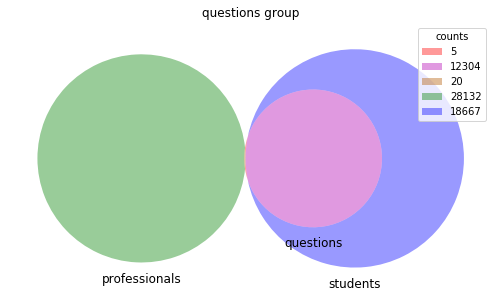

In [39]:
plot_venn3(questions_fixed, professionals, students, 'questions_author_id', 'professionals_id', 'students_id', 
          'questions', 'professionals', 'students', 'questions group')

Professionals are the main group for answering questions.

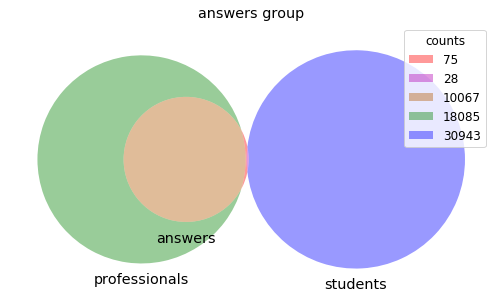

In [40]:
plot_venn3(answer_fixed, professionals, students, 'answers_author_id', 'professionals_id', 'students_id', 
          'answers', 'professionals', 'students', 'answers group')

So students much more active in commenting.



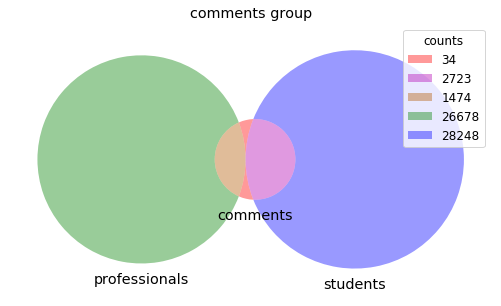

In [41]:
plot_venn3(comments, professionals, students, 'comments_author_id', 'professionals_id', 'students_id', 
          'comments', 'professionals', 'students', 'comments group')

Most emails are sent to professionals.

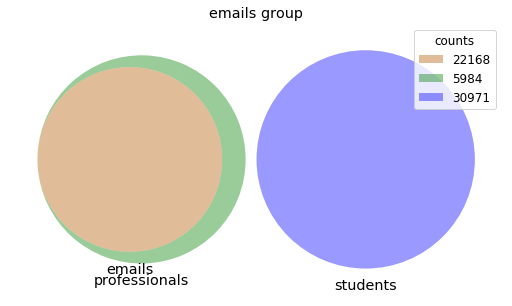

In [42]:
plot_venn3(emails, professionals, students, 'emails_recipient_id', 'professionals_id', 'students_id', 
          'emails', 'professionals', 'students', 'emails group')

As we can see professionals are more active in various groups participation.

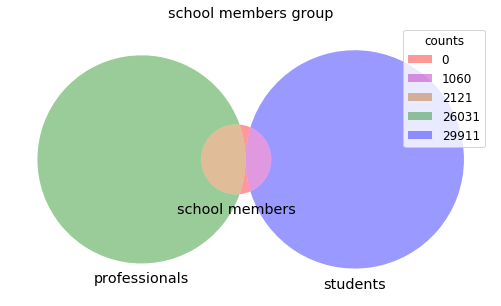

In [43]:
plot_venn3(school_memberships, professionals, students, 'school_memberships_user_id', 'professionals_id', 'students_id', 
          'school members', 'professionals', 'students', 'school members group')

Professionals are much better in adding tags for questions.

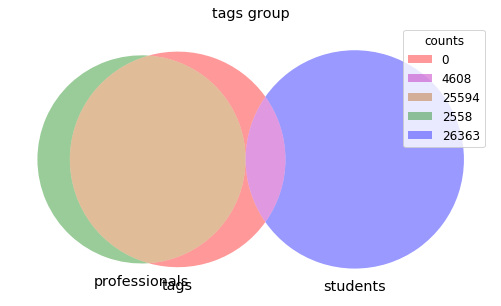

In [44]:
plot_venn3(tag_users, professionals, students, 'tag_users_user_id', 'professionals_id', 'students_id', 
          'tags', 'professionals', 'students', 'tags group')

In [45]:
## Barh and Pie charts
def plot_barh_pie(df, by_col, tar_col, top_num, x_label, barh_title, 
                  pie_label1, pie_label2, pie_title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    
    df_fix = df[[by_col, tar_col]].copy()
    df_n = df_fix.groupby(by_col).count().sort_values(by=tar_col, ascending=True)
    
    # Draw barh chart
    df_top = df_n.tail(top_num)
    df_top.plot.barh(color='b', width=0.8, ax=ax1)
    ax1.set_xlabel(x_label)
    ax1.set_title(barh_title)
    
    # Draw pie chart
    slice_index = -1 * top_num
    top_num = pd.DataFrame(data={by_col:[pie_label1], tar_col:[df_n[tar_col][slice_index:].sum()] })
    other_num = pd.DataFrame(data={by_col:[pie_label2], tar_col:[df_n[tar_col][:slice_index].sum()] })

    top_num = pd.concat([top_num, other_num])

    ax2.pie(x=top_num[tar_col], labels=[pie_label1, pie_label2], autopct='%.2f%%')
    ax2.set_title(pie_title)
    
    plt.show()

Most paticipants no matter who are students or professionals are from New York,New York.

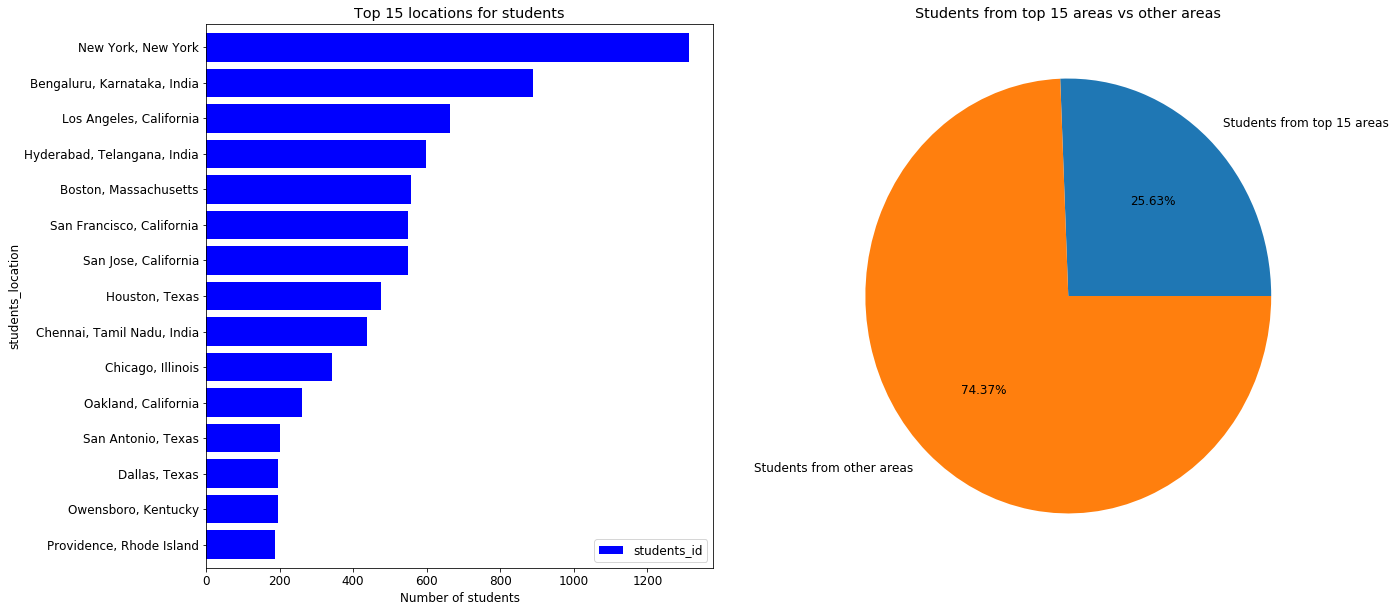

In [46]:
plot_barh_pie(students, 'students_location', 'students_id', 15, 'Number of students', 'Top 15 locations for students', 
              'Students from top 15 areas', 'Students from other areas', 'Students from top 15 areas vs other areas')

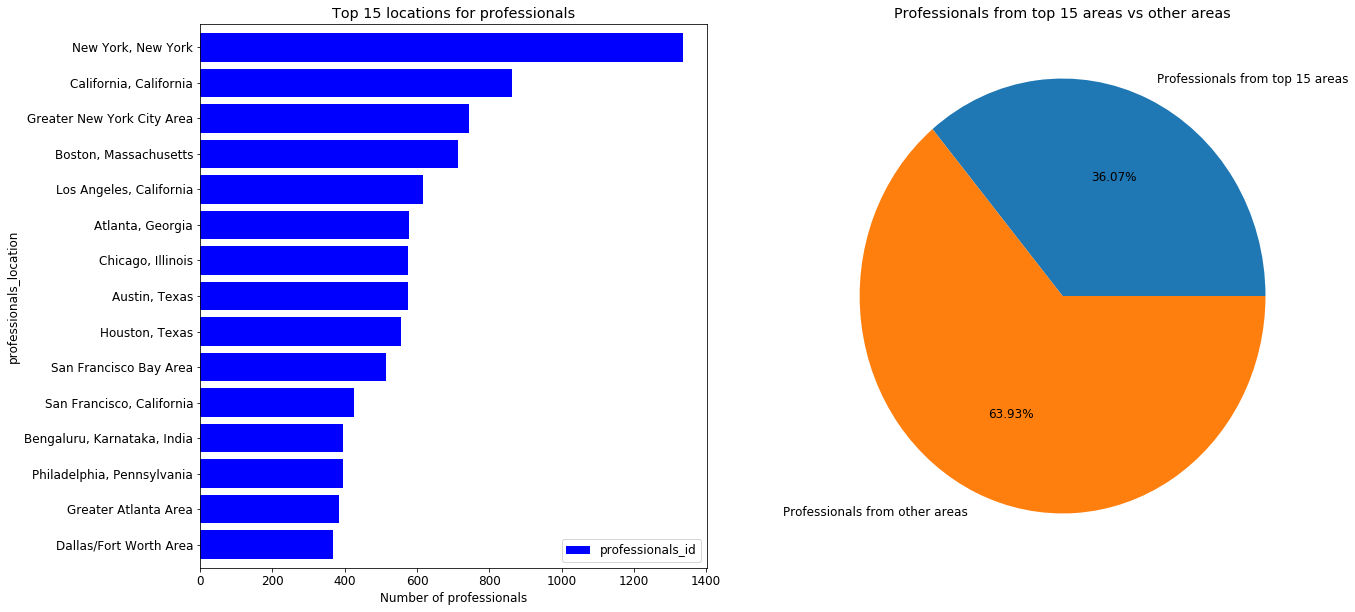

In [47]:
plot_barh_pie(professionals, 'professionals_location', 'professionals_id', 15, 'Number of professionals', 'Top 15 locations for professionals', 
              'Professionals from top 15 areas', 'Professionals from other areas', 'Professionals from top 15 areas vs other areas')


Professionals who are from telecommunications and are solutions managers are more likely to participate in answering questions. Professionals from top 15 headlines are only 4.17% of total professionals, which means headlines cannot become a factor in deciding if a professional will answer a question.

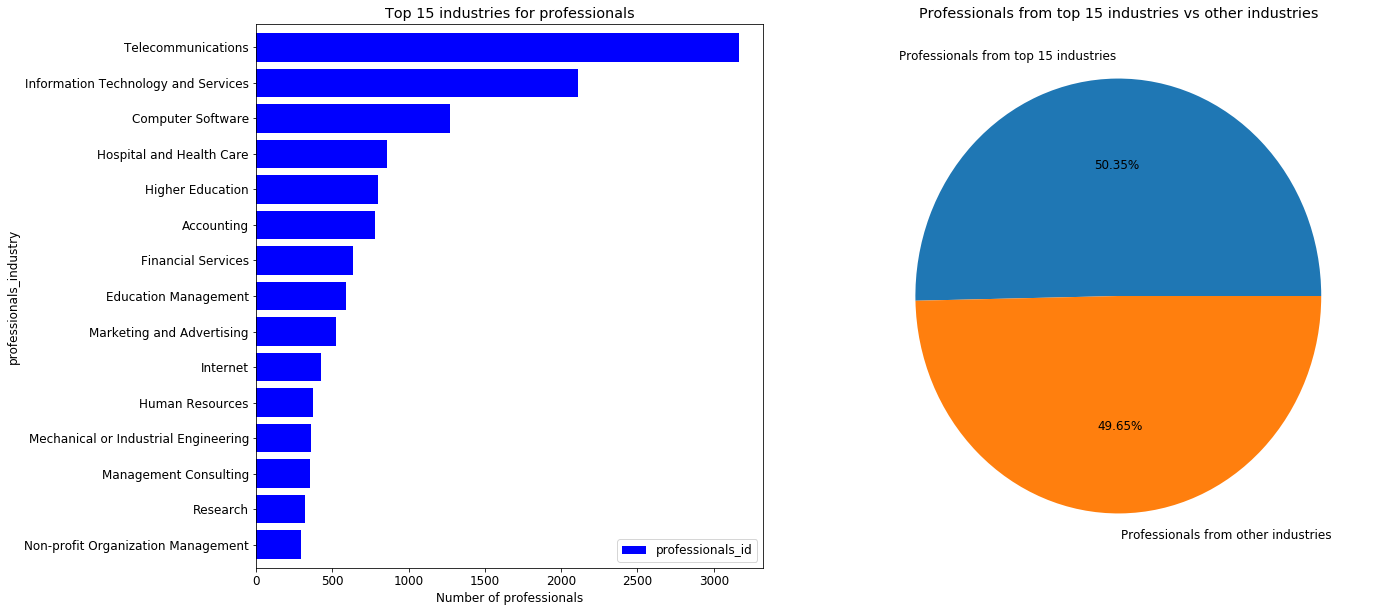

In [48]:
plot_barh_pie(professionals, 'professionals_industry', 'professionals_id', 15, 'Number of professionals', 'Top 15 industries for professionals', 
              'Professionals from top 15 industries', 'Professionals from other industries', 'Professionals from top 15 industries vs other industries')


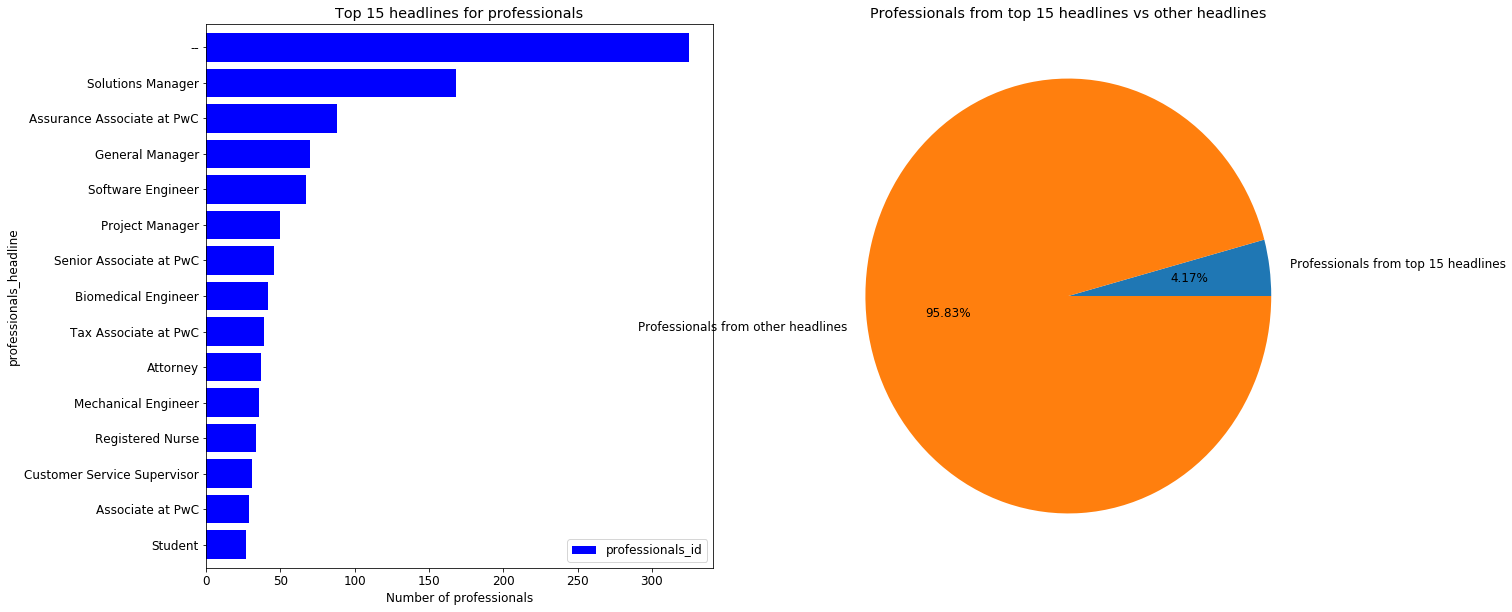

In [49]:
plot_barh_pie(professionals, 'professionals_headline', 'professionals_id', 15, 'Number of professionals', 'Top 15 headlines for professionals', 
              'Professionals from top 15 headlines', 'Professionals from other headlines', 'Professionals from top 15 headlines vs other headlines')


Most tags posted on questions are related to college.

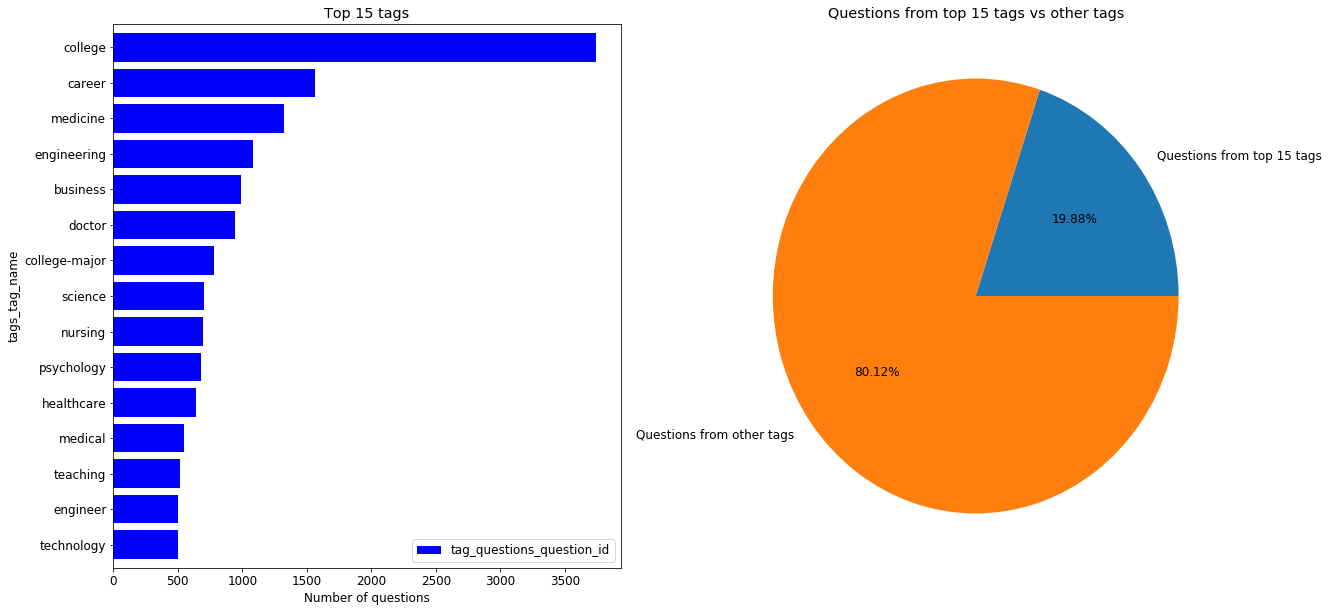

In [50]:
plot_barh_pie(tag_fixed, 'tags_tag_name', 'tag_questions_question_id', 15, 'Number of questions', 'Top 15 tags', 
              'Questions from top 15 tags', 'Questions from other tags', 'Questions from top 15 tags vs other tags')
    

## Part III: Conclusion and Next Step

Underserved youth can seek advice on their career path from professional volunteers in different fields through CareerVillage.org. Students who posted questions on CareerVillage.org are most from United States and India. New York, California and Texas are the most popular states where students in United States are from, Bengaluru, Hyderabad and Chennai are the most popular areas students in India posted their questions. <br/>
<br/>Professional volunteers who are willing to answer career questions are from different locations, industries and titles. New York, California and Texas are popular locations where volunteers come from, Telecommunications and Information Technology are two major fields volunteers work in. Professionals’ headlines cannot become a major parameter in deciding if they are willing to answer students’ questions, especially when most do not even post their headlines. Through tags analysis, college and career are two general topics popular among questions. And specific to majors, medicine, engineering and business are top 3 majors students want to seek for career advices.
<br/><br/>Current analysis are mainly based on Exploratory Data Analysis(EDA). But through the third reference, we can see a more advanced analysis in using NLP. With NLP, we may analyze questions body and answers body in details, and this may become an exciting discover.